In [24]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
df = pd.read_fwf('mass.mas03', usecols=(2, 3, 11),
                 widths=(1, 3, 5, 5, 5, 1, 3, 4, 1, 13, 11, 11,
                         9, 1, 2, 11, 9, 1, 3, 1, 12, 11, 1),
                 skiprows=41, header=None,
                 index_col=False)
df.columns = ('N', 'Z',  'avEbind')

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the avEbind column won't be numeric. Coerce to float and drop these entries.
df['avEbind'] = pd.to_numeric(df['avEbind'], errors='coerce')
df = df.dropna()
df["A"] = df.N + df.Z


In [3]:
aV = 15750
aS = 17800
aC = 711
aA = 23700
aP = 11180
kP = -0.5

df['parity'] = 0 
df.parity = np.where((df.N % 2 == 1) & (df.Z % 2 == 1), -aP * pow(df.A, kP), df.parity)
df.parity = np.where((df.N % 2 == 0) & (df.Z % 2 == 0), +aP * pow(df.A, kP), df.parity)

df['LDM'] = (aV * df.A - aS * pow(df.A, 2/3) - aC * df.Z*(df.Z-1)/pow(df.A,1/3) - aA * pow(df.N-df.Z, 2)/df.A + df.parity) / df.A
df['res'] = df.avEbind - df.LDM
df

,N,Z,avEbind,A,parity,LDM,res
0,1,1,1112.283,2,-7905.453814,-2330.596269,3442.879269
1,2,1,2827.266,3,0.000000,774.835983,2052.430017
2,1,2,2572.681,3,0.000000,446.182739,2126.498261
4,3,1,1400.351,4,-5590.000000,-2785.797344,4186.148344
5,2,2,7073.915,4,5590.000000,5710.251689,1363.663311
...,...,...,...,...,...,...,...
3010,157,101,7409.669,258,-696.036398,7462.492866,-52.823866
3029,154,106,7342.424,260,693.354166,7387.326192,-44.902192
3034,157,104,7371.396,261,0.000000,7421.234416,-49.838416
3058,156,108,7298.239,264,688.081435,7342.964526,-44.725526


In [4]:
df['res2']=df.res**2
df.res2.sum()/df.shape[0]

92611.52508555225

-224.96259939732772 6303.386486285056


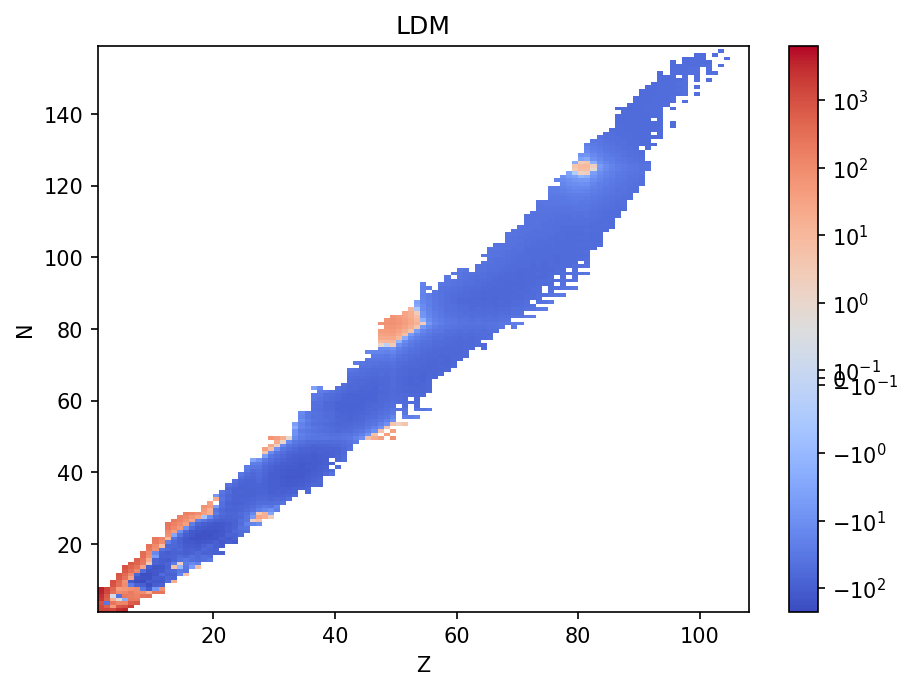

<Figure size 432x288 with 0 Axes>

In [44]:
pdf=df.drop(['avEbind','A', 'parity', 'LDM', 'res2'], axis = 1)
tp=pdf.set_index(['Z', 'N']).res.unstack(0)

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
z_min=pdf.res.min()
z_max=pdf.res.max()
print(z_min, z_max)

# c = ax.pcolormesh(tp, cmap= cm.coolwarm, norm=colors.LogNorm(vmin=z_min, vmax=z_max)) 
c=ax.pcolormesh(tp, norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=z_min, vmax=z_max, base=10),
                       cmap=cm.coolwarm, shading='auto')

ax.set_title('LDM')
# set the limits of the plot to the limits of the data
ax.axis([pdf.Z.min(), pdf.Z.max(), pdf.N.min(), pdf.N.max()])
fig.colorbar(c, ax=ax)

ax.set_xlabel('Z')
ax.set_ylabel('N')

plt.show()
plt.savefig("LDM.png", dpi=150)